<a href="https://colab.research.google.com/github/siddartharaj06/road-safety/blob/main/Road_Accidents_due_to_Driver_Violations_(India).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Road Accidents due to Driver Violations (India)**


**Dataset Description**

The dataset, titled Driver Response Dataset (2014–2016), contains state/UT-level records from across India on the major causes of road accidents during two time periods: 2014 and 2016. It comprises 36 rows (states/UTs) and 21 attributes.

Geographic Features

stateut: Name of the state or union territory.

region, regionid: Categorical identifiers grouping states into regions (North, South, East, West, Centre, Northeast).

Accident Cause Features (2014 & 2016)
Each of the following driver-related causes of road accidents is recorded separately for 2014 and 2016:

alcintake: Accidents due to alcohol intake.

overspeed: Accidents due to overspeeding.

overtaking: Accidents due to improper/overtaking maneuvers.

lanejumping: Accidents due to jumping lanes.

wrongside: Accidents due to driving on the wrong side.

signalavoid: Accidents due to signal violations.

asleep: Accidents caused by drivers falling asleep.

othercause: Miscellaneous other driver-related causes.

The dataset records absolute accident counts for each cause, enabling comparison across states, regions, and years.

**What Can Be Done with This Dataset**

**Descriptive Analysis**

Identify leading causes of road accidents across India and by region.

Compare accident cause distributions between 2014 and 2016 to detect patterns or improvements.

Rank states by accident prevalence due to specific causes (e.g., overspeeding vs alcohol).

**Trend & Comparative Analysis**

Quantify the percentage increase/decrease in accidents due to different causes.

Compare regional patterns (e.g., Is overspeeding more critical in the South vs North?).

**Correlation & Statistical Inference**

Examine correlations between accident causes (e.g., overspeeding vs overtaking).

Perform hypothesis testing to assess if the changes between 2014 and 2016 are statistically significant.

**Predictive Modeling (if extended)**

Use regression or time-series forecasting to predict future accident trends.

Apply clustering to group states with similar accident profiles.

**Policy Insights**

Identify priority states/regions requiring targeted interventions.

Highlight causes that worsened over time despite policies, suggesting gaps in enforcement.

## Problem Statement


Road traffic accidents remain a leading cause of fatalities and injuries in India, largely attributable to unsafe driver behaviors such as overspeeding, alcohol intake, and signal violations. While national reports provide aggregate statistics, there is a lack of detailed state- and region-wise analytical studies that track accident causes over time. Without such analysis, it becomes challenging for policymakers to identify priority regions, emerging risk factors, and the effectiveness of interventions between different time periods.

The problem, therefore, is to analyze driver-related causes of accidents across Indian states and regions over multiple years, and derive actionable insights for road safety improvement.

#**Objectives**



You can include 2–3 main objectives like:

To analyze and compare the trends in driver-related accident causes (such as overspeeding, alcohol intake, and signal avoidance) across Indian states and regions for the years 2014 and 2016.

To identify significant changes in accident patterns over time and evaluate which regions or states show increasing or decreasing trends for specific causes.

To provide data-driven insights that can guide policymakers and road safety authorities in designing targeted interventions and enforcement strategies for reducing driver-related accidents.

# **Suitable Algorithms**

**1.Classification Tasks:**

**Objective:** Predict the dominant cause of accidents in 2016 using 2014 features.

**Algorithms Used:**


Logistic Regression → as a baseline interpretable classifier.

Support Vector Machine (SVM with RBF kernel) → handles small datasets well and finds nonlinear boundaries.

Random Forest Classifier → robust to noise, gives feature importance, and works well for tabular data.

XGBoost Classifier → state-of-the-art boosting algorithm, high accuracy on structured data.

**2. Regression Task**

Objective: Predict the total number of accidents in 2016 from 2014 features.

**Algorithms Used:**

Linear Regression → baseline regression with interpretability.

Ridge & Lasso Regression → regularized models to handle collinearity and avoid overfitting.

Random Forest Regressor → captures nonlinear relationships and feature interactions.

XGBoost Regressor → gradient boosting model with superior performance on small structured datasets.

**3. Clustering Task**

Objective: Group states with similar accident profiles (2016 proportions).

**Algorithms Used:**

K-Means Clustering → to form compact, spherical clusters of states with similar patterns.

Agglomerative (Hierarchical) Clustering → useful for dendrogram analysis and hierarchical relationships between states.

(Optional) DBSCAN → if you want to highlight potential outlier states with unusual patterns.

**Why These Algorithms Are Suitable**

The dataset is small (36 rows × 21 columns) → so deep learning is not ideal (risk of overfitting).

Tree-based models (Random Forest, XGBoost) perform well on tabular, heterogeneous features.

Linear models (Logistic, Linear, Ridge, Lasso) provide interpretability, which is important for policy insights.

Clustering algorithms help discover regional/state profiles, aiding in policy-making and comparative analysis.

# **Setup & Environment**

In [41]:
#@title Install libraries (safe to re-run)
!pip -q install xgboost shap --upgrade


In [42]:
#@title Imports & Global Config
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import json
import warnings

from pathlib import Path
from pprint import pprint

from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (accuracy_score, f1_score, confusion_matrix, classification_report,
                             r2_score, mean_absolute_error, mean_squared_error, silhouette_score)
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.linear_model import LogisticRegression, Ridge, Lasso, LinearRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from xgboost import XGBClassifier, XGBRegressor

warnings.filterwarnings("ignore")
np.random.seed(42)

# Pretty plotting
plt.rcParams["figure.figsize"] = (8,5)
sns.set(style="whitegrid", rc={"axes.spines.right": False, "axes.spines.top": False})


##**Load Data**

In [43]:
#@title Option A: Upload CSV manually
# After running, choose your file: driverresponse.csv

df_raw = pd.read_csv('/content/driverresponse.csv')
print("Loaded:", "shape:", df_raw.shape)
df_raw.head()

Loaded: shape: (36, 21)


,index,sno,stateut,region,regionid,alcintake2014,overspeed2014,overtaking2014,lanejumping2014,wrongside2014,...,asleep2014,othercause2014,alcintake2016,overspeed2016,signalavoid2016,wrongside2016,lanejumping2016,overtaking2016,asleep2016,othercause2016
0,0,1,Andhra Pradesh,south,2,594,12747.0,507,328,668,...,154,1938,128,17286,40,667,325,1024,306,2868
1,1,2,Arunachal Pradesh,northeast,5,11,16.0,0,0,0,...,0,22,15,45,0,7,11,8,8,18
2,2,3,Assam,northeast,5,613,4596.0,129,104,156,...,3,628,352,3520,64,334,156,371,3,873
3,3,4,Bihar,north,1,1680,1496.0,278,236,308,...,72,439,593,2323,8,458,156,573,122,612
4,4,5,Chhattisgarh,centre,9,335,6720.0,188,313,266,...,81,520,145,6660,62,410,175,467,144,953


In [44]:
#@title Option B: Load from Google Drive (put the file path below)
# Mount drive and set path
from google.colab import drive
csv_path = "/content/driverresponse.csv"  # <-- change if needed
df_raw = pd.read_csv(csv_path)
print("Loaded:", csv_path, "shape:", df_raw.shape)
df_raw.head()


Loaded: /content/driverresponse.csv shape: (36, 21)


,index,sno,stateut,region,regionid,alcintake2014,overspeed2014,overtaking2014,lanejumping2014,wrongside2014,...,asleep2014,othercause2014,alcintake2016,overspeed2016,signalavoid2016,wrongside2016,lanejumping2016,overtaking2016,asleep2016,othercause2016
0,0,1,Andhra Pradesh,south,2,594,12747.0,507,328,668,...,154,1938,128,17286,40,667,325,1024,306,2868
1,1,2,Arunachal Pradesh,northeast,5,11,16.0,0,0,0,...,0,22,15,45,0,7,11,8,8,18
2,2,3,Assam,northeast,5,613,4596.0,129,104,156,...,3,628,352,3520,64,334,156,371,3,873
3,3,4,Bihar,north,1,1680,1496.0,278,236,308,...,72,439,593,2323,8,458,156,573,122,612
4,4,5,Chhattisgarh,centre,9,335,6720.0,188,313,266,...,81,520,145,6660,62,410,175,467,144,953


#**Data Overview & Cleaning**

In [ ]:
# Basic info
print("Shape:", df_raw.shape)
print("\nColumns:", list(df_raw.columns))
print("\nDTypes:\n", df_raw.dtypes)
print("\nMissing values:\n", df_raw.isna().sum())

# Make a working copy
df = df_raw.copy()

# Common administrative columns to drop if present
to_drop = [c for c in ["index", "sno", "regionid"] if c in df.columns]
df.drop(columns=to_drop, inplace=True, errors="ignore")

# Ensure canonical column order (optional)
df.columns = [c.strip().lower() for c in df.columns]

# Identify meta columns and numeric cause columns
meta_cols = [c for c in ["stateut", "region"] if c in df.columns]

# All cause/year columns (infer by suffix)
cause_year_cols = [c for c in df.columns if any(s in c for s in ["2014","2016"])]

# Coerce numeric cause columns
for c in cause_year_cols:
    df[c] = pd.to_numeric(df[c], errors="coerce")

# Quick sanity check after clean
print("\nAfter cleaning -> shape:", df.shape)
df.head()


Shape: (36, 21)

Columns: ['index', 'sno', 'stateut', 'region', 'regionid', 'alcintake2014', 'overspeed2014', 'overtaking2014', 'lanejumping2014', 'wrongside2014', 'signalavoid2014', 'asleep2014', 'othercause2014', 'alcintake2016', 'overspeed2016', 'signalavoid2016', 'wrongside2016', 'lanejumping2016', 'overtaking2016', 'asleep2016', 'othercause2016']

DTypes:
 index                int64
sno                  int64
stateut             object
region              object
regionid             int64
alcintake2014        int64
overspeed2014      float64
overtaking2014       int64
lanejumping2014      int64
wrongside2014        int64
signalavoid2014      int64
asleep2014           int64
othercause2014       int64
alcintake2016        int64
overspeed2016        int64
signalavoid2016      int64
wrongside2016        int64
lanejumping2016      int64
overtaking2016       int64
asleep2016           int64
othercause2016       int64
dtype: object

Missing values:
 index              0
sno             

,stateut,region,alcintake2014,overspeed2014,overtaking2014,lanejumping2014,wrongside2014,signalavoid2014,asleep2014,othercause2014,alcintake2016,overspeed2016,signalavoid2016,wrongside2016,lanejumping2016,overtaking2016,asleep2016,othercause2016
0,Andhra Pradesh,south,594,12747.0,507,328,668,29,154,1938,128,17286,40,667,325,1024,306,2868
1,Arunachal Pradesh,northeast,11,16.0,0,0,0,0,0,22,15,45,0,7,11,8,8,18
2,Assam,northeast,613,4596.0,129,104,156,7,3,628,352,3520,64,334,156,371,3,873
3,Bihar,north,1680,1496.0,278,236,308,7,72,439,593,2323,8,458,156,573,122,612
4,Chhattisgarh,centre,335,6720.0,188,313,266,10,81,520,145,6660,62,410,175,467,144,953


# **Feature Engineering (Totals, Proportions, Changes, Dominant Cause)**

In [ ]:
# Split by year
causes = ["alcintake","overspeed","overtaking","lanejumping","wrongside","signalavoid","asleep","othercause"]
y2014 = [f"{c}2014" for c in causes if f"{c}2014" in df.columns]
y2016 = [f"{c}2016" for c in causes if f"{c}2016" in df.columns]

# Totals per year
df["total2014"] = df[y2014].sum(axis=1)
df["total2016"] = df[y2016].sum(axis=1)

# Proportions per year
for c in causes:
    c14 = f"{c}2014"; c16 = f"{c}2016"
    if c14 in df.columns:
        df[f"prop_{c}_2014"] = df[c14] / (df["total2014"] + 1e-9)
    if c16 in df.columns:
        df[f"prop_{c}_2016"] = df[c16] / (df["total2016"] + 1e-9)

# Absolute and percentage change (2014->2016)
for c in causes:
    c14 = f"{c}2014"; c16 = f"{c}2016"
    if c14 in df.columns and c16 in df.columns:
        df[f"delta_{c}"] = df[c16] - df[c14]
        df[f"pctchg_{c}"] = (df[f"delta_{c}"] / (df[c14] + 1e-9)) * 100

df["delta_total"] = df["total2016"] - df["total2014"]
df["pctchg_total"] = (df["delta_total"] / (df["total2014"] + 1e-9)) * 100

# Dominant cause for 2016 (classification target)
def dominant_cause_2016(row):
    vals = {c: row.get(f"{c}2016", np.nan) for c in causes if f"{c}2016" in df.columns}
    if len(vals) == 0:
        return np.nan
    return max(vals, key=vals.get)

df["dominant_cause_2016"] = df.apply(dominant_cause_2016, axis=1)

# Final check
df.head()


,stateut,region,alcintake2014,overspeed2014,overtaking2014,lanejumping2014,wrongside2014,signalavoid2014,asleep2014,othercause2014,...,delta_signalavoid,pctchg_signalavoid,delta_asleep,pctchg_asleep,delta_othercause,pctchg_othercause,delta_total,pctchg_total,dominant_cause_2016,cluster_kmeans
0,Andhra Pradesh,south,594,12747.0,507,328,668,29,154,1938,...,11,37.931034,152,9.870130e+01,930,47.987616,5679.0,33.474801,overspeed,0
1,Arunachal Pradesh,northeast,11,16.0,0,0,0,0,0,22,...,0,0.000000,8,8.000000e+11,-4,-18.181818,63.0,128.571429,overspeed,0
2,Assam,northeast,613,4596.0,129,104,156,7,3,628,...,57,814.285714,0,0.000000e+00,245,39.012739,-563.0,-9.028223,overspeed,0
3,Bihar,north,1680,1496.0,278,236,308,7,72,439,...,1,14.285714,50,6.944444e+01,173,39.407745,329.0,7.285208,overspeed,0
4,Chhattisgarh,centre,335,6720.0,188,313,266,10,81,520,...,52,520.000000,63,7.777778e+01,433,83.269231,583.0,6.913317,overspeed,0


#**Exploratory Data Analysis (EDA)**

States/UTs: 36
Regions: 9

Dominant cause counts (2016):
dominant_cause_2016
overspeed     29
alcintake      4
othercause     3
Name: count, dtype: int64


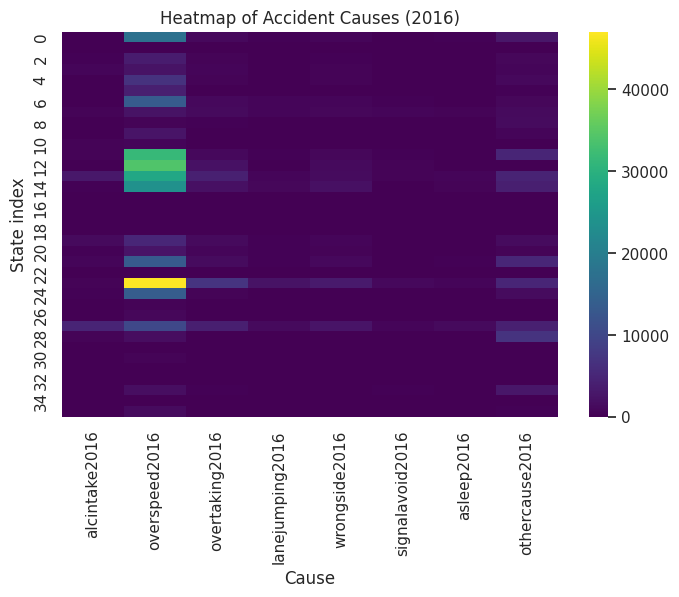

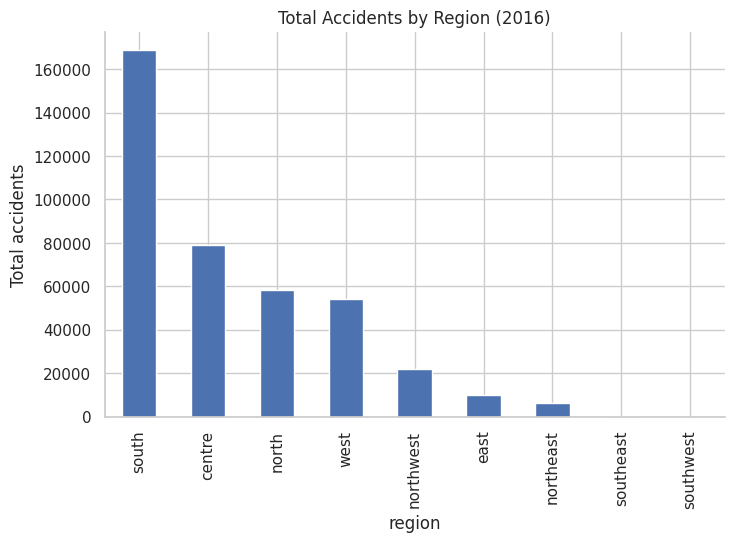

In [ ]:
# Top-line stats
print("States/UTs:", df.shape[0])
print("Regions:", df["region"].nunique() if "region" in df.columns else "NA")
print("\nDominant cause counts (2016):")
print(df["dominant_cause_2016"].value_counts(dropna=False))

# Heatmap of 2016 causes
plt.figure()
sns.heatmap(df[y2016].fillna(0), cmap="viridis")
plt.title("Heatmap of Accident Causes (2016)")
plt.xlabel("Cause")
plt.ylabel("State index")
plt.show()

# Regional totals 2016
if "region" in df.columns:
    reg_total = df.groupby("region")["total2016"].sum().sort_values(ascending=False)
    reg_total.plot(kind="bar")
    plt.title("Total Accidents by Region (2016)")
    plt.ylabel("Total accidents")
    plt.show()


In [ ]:
# Change distribution (2014 -> 2016)
chg_cols = [c for c in df.columns if c.startswith("pctchg_") and c != "pctchg_total"]
chg = df[chg_cols].describe().T.sort_values("mean", ascending=False)
chg[["mean","std","min","25%","50%","75%","max"]]


,mean,std,min,25%,50%,75%,max
pctchg_othercause,1.211944e+13,5.201593e+13,-100.0,-29.376584,39.210242,220.948521,2.838000e+14
pctchg_alcintake,1.500000e+12,7.753967e+12,-100.0,-65.193452,-15.545711,50.595238,4.620000e+13
pctchg_overtaking,9.527778e+11,3.659936e+12,-100.0,1.853612,135.182709,840.178571,2.110000e+13
pctchg_signalavoid,6.694444e+11,3.814695e+12,-100.0,0.000000,7.142857,467.173913,2.290000e+13
pctchg_wrongside,5.611111e+11,2.269207e+12,-100.0,-0.037425,49.121991,151.547510,1.310000e+13
pctchg_lanejumping,3.888889e+11,2.152577e+12,-100.0,-80.311150,-11.386296,0.000000,1.290000e+13
pctchg_overspeed,1.628571e+11,9.634759e+11,-100.0,-22.023052,31.914894,64.311998,5.700000e+12
pctchg_asleep,1.333333e+11,5.220837e+11,-100.0,0.000000,0.000000,194.767442,3.000000e+12


# **Task A — Classification: Predict Dominant Cause (2016)**

**Goal: Predict dominant_cause_2016 using 2014 causes, proportions, and optional region.**

In [ ]:
# Build feature matrix and labels
target_cls = "dominant_cause_2016"

# Choose features (avoid leakage by excluding 2016 raw counts from predictors)
num_feats = [c for c in df.columns if (
    c.startswith("prop_") and c.endswith("_2014")
) or c.endswith("2014") or c in ["total2014"]]

cat_feats = [c for c in ["region"] if c in df.columns]

X_cls = df[num_feats + cat_feats].copy()
y_cls = df[target_cls].copy()

# Drop rows with missing label
mask = y_cls.notna()
X_cls, y_cls = X_cls[mask], y_cls[mask]

# Encode target labels to numerical
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_cls_encoded = le.fit_transform(y_cls)


# Preprocess
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocess_cls = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, [c for c in X_cls.columns if c in num_feats]),
        ("cat", categorical_transformer, [c for c in X_cls.columns if c in cat_feats]),
    ],
    remainder="drop"
)

# Candidate models
models_cls = {
    "LogisticRegression": LogisticRegression(max_iter=200, multi_class="auto"),
    "SVM-RBF": SVC(kernel="rbf", probability=True),
    "RandomForest": RandomForestClassifier(n_estimators=300, random_state=42),
    "XGBClassifier": XGBClassifier(
        n_estimators=400, max_depth=3, learning_rate=0.05, subsample=0.8,
        colsample_bytree=0.8, eval_metric="mlogloss", random_state=42
    )
}

# Stratified CV due to small N
skf = StratifiedKFold(n_splits=min(5, X_cls.shape[0]), shuffle=True, random_state=42)

results_cls = {}
for name, model in models_cls.items():
    pipe = Pipeline(steps=[("prep", preprocess_cls), ("model", model)])
    acc = cross_val_score(pipe, X_cls, y_cls_encoded, cv=skf, scoring="accuracy")
    f1m = cross_val_score(pipe, X_cls, y_cls_encoded, cv=skf, scoring="f1_macro")
    results_cls[name] = {"accuracy_mean": acc.mean(), "accuracy_std": acc.std(),
                         "f1_macro_mean": f1m.mean(), "f1_macro_std": f1m.std()}

print("Classification (Stratified CV) results:")
pprint(results_cls)

# Fit best model on full data for later use/explainability
best_name = max(results_cls, key=lambda k: results_cls[k]["f1_macro_mean"])
best_cls = Pipeline(steps=[("prep", preprocess_cls), ("model", models_cls[best_name])])
best_cls.fit(X_cls, y_cls_encoded)
print("\nBest classifier:", best_name)

Classification (Stratified CV) results:
{'LogisticRegression': {'accuracy_mean': np.float64(0.7500000000000001),
                        'accuracy_std': np.float64(0.055328333517248786),
                        'f1_macro_mean': np.float64(0.31611721611721605),
                        'f1_macro_std': np.float64(0.07277556512113433)},
 'RandomForest': {'accuracy_mean': np.float64(0.8357142857142857),
                  'accuracy_std': np.float64(0.09999999999999999),
                  'f1_macro_mean': np.float64(0.5401709401709403),
                  'f1_macro_std': np.float64(0.24259957698229945)},
 'SVM-RBF': {'accuracy_mean': np.float64(0.8071428571428572),
             'accuracy_std': np.float64(0.06226998490772388),
             'f1_macro_mean': np.float64(0.3896214896214897),
             'f1_macro_std': np.float64(0.08811569151055003)},
 'XGBClassifier': {'accuracy_mean': np.float64(0.7785714285714287),
                   'accuracy_std': np.float64(0.06546536707079768),
           

Hold-out accuracy: 0.7777777777777778
Hold-out f1_macro: 0.2916666666666667

Classification Report:
               precision    recall  f1-score   support

   alcintake       0.00      0.00      0.00         1
  othercause       0.00      0.00      0.00         1
   overspeed       0.78      1.00      0.88         7

    accuracy                           0.78         9
   macro avg       0.26      0.33      0.29         9
weighted avg       0.60      0.78      0.68         9



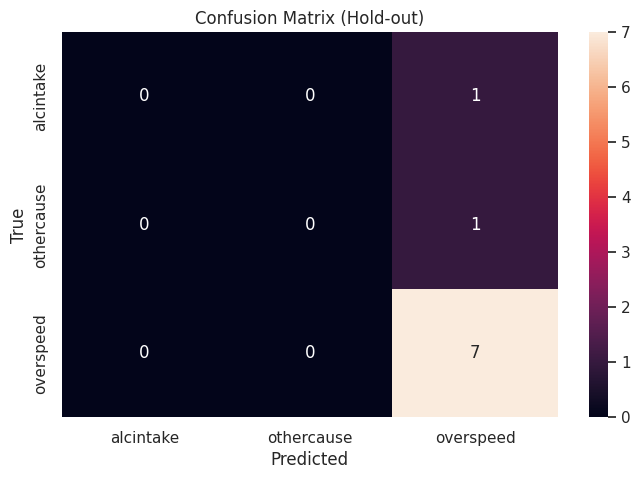

In [ ]:
# Hold-out mini evaluation (optional) if you prefer a test split
if X_cls.shape[0] >= 10:
    Xtr, Xte, ytr, yte = train_test_split(X_cls, y_cls, test_size=0.25, stratify=y_cls, random_state=42)
    best_cls_split = Pipeline(steps=[("prep", preprocess_cls), ("model", models_cls[best_name])])
    best_cls_split.fit(Xtr, ytr)
    ypred = best_cls_split.predict(Xte)
    print("Hold-out accuracy:", accuracy_score(yte, ypred))
    print("Hold-out f1_macro:", f1_score(yte, ypred, average="macro"))
    print("\nClassification Report:\n", classification_report(yte, ypred))
    cm = confusion_matrix(yte, ypred, labels=np.unique(y_cls))
    sns.heatmap(cm, annot=True, fmt="d", xticklabels=np.unique(y_cls), yticklabels=np.unique(y_cls))
    plt.title("Confusion Matrix (Hold-out)")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()


# **Task B — Regression: Predict Total Accidents (2016)**

**Goal: Predict total2016 from 2014 features (counts & proportions) + region.**

In [ ]:
target_reg = "total2016"

num_feats_reg = [c for c in df.columns if (
    c.endswith("2014") or (c.startswith("prop_") and c.endswith("_2014"))
) or c == "total2014"]

cat_feats_reg = [c for c in ["region"] if c in df.columns]

X_reg = df[num_feats_reg + cat_feats_reg].copy()
y_reg = df[target_reg].copy()

# Drop missing targets if any
mask = y_reg.notna()
X_reg, y_reg = X_reg[mask], y_reg[mask]

numeric_transformer_reg = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])
categorical_transformer_reg = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocess_reg = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer_reg, [c for c in X_reg.columns if c in num_feats_reg]),
        ("cat", categorical_transformer_reg, [c for c in X_reg.columns if c in cat_feats_reg]),
    ],
    remainder="drop"
)

models_reg = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(alpha=5.0),
    "Lasso": Lasso(alpha=0.01),
    "RandomForestRegressor": RandomForestRegressor(n_estimators=400, random_state=42),
    "XGBRegressor": XGBRegressor(
        n_estimators=500, max_depth=3, learning_rate=0.05, subsample=0.8,
        colsample_bytree=0.8, random_state=42
    )
}

kf = KFold(n_splits=min(5, X_reg.shape[0]), shuffle=True, random_state=42)

def cv_reg(pipe):
    r2 = cross_val_score(pipe, X_reg, y_reg, cv=kf, scoring="r2")
    mae = -cross_val_score(pipe, X_reg, y_reg, cv=kf, scoring="neg_mean_absolute_error")
    rmse = np.sqrt(-cross_val_score(pipe, X_reg, y_reg, cv=kf, scoring="neg_mean_squared_error"))
    return {"r2_mean": r2.mean(), "r2_std": r2.std(),
            "mae_mean": mae.mean(), "mae_std": mae.std(),
            "rmse_mean": rmse.mean(), "rmse_std": rmse.std()}

results_reg = {}
for name, model in models_reg.items():
    pipe = Pipeline(steps=[("prep", preprocess_reg), ("model", model)])
    results_reg[name] = cv_reg(pipe)

print("Regression (KFold CV) results:")
pprint(results_reg)

best_name_reg = max(results_reg, key=lambda k: results_reg[k]["r2_mean"])
best_reg = Pipeline(steps=[("prep", preprocess_reg), ("model", models_reg[best_name_reg])])
best_reg.fit(X_reg, y_reg)
print("\nBest regressor:", best_name_reg)


Regression (KFold CV) results:
{'Lasso': {'mae_mean': np.float64(9610.87241785658),
           'mae_std': np.float64(5510.62348659389),
           'r2_mean': np.float64(-0.5256530075512967),
           'r2_std': np.float64(1.389901528159346),
           'rmse_mean': np.float64(15377.797152173522),
           'rmse_std': np.float64(9976.408628512461)},
 'LinearRegression': {'mae_mean': np.float64(2568700754067.4634),
                      'mae_std': np.float64(5137401480094.793),
                      'r2_mean': np.float64(-1.4239029573111736e+18),
                      'r2_std': np.float64(2.8478059146223473e+18),
                      'rmse_mean': np.float64(6796143374357.656),
                      'rmse_std': np.float64(13592286700537.906)},
 'RandomForestRegressor': {'mae_mean': np.float64(2873.5784732142856),
                           'mae_std': np.float64(2458.730976952342),
                           'r2_mean': np.float64(0.8969968892642048),
                           'r2_std'

# **Task C — Clustering: State Profiles (2016)**

Silhouette by k: {2: np.float64(0.330244432877169), 3: np.float64(0.29114789929145524), 4: np.float64(0.32940470084534235), 5: np.float64(0.320305179680969), 6: np.float64(0.1438342674967761)}
Best k = 2
cluster_kmeans
0    32
1     4
Name: count, dtype: int64


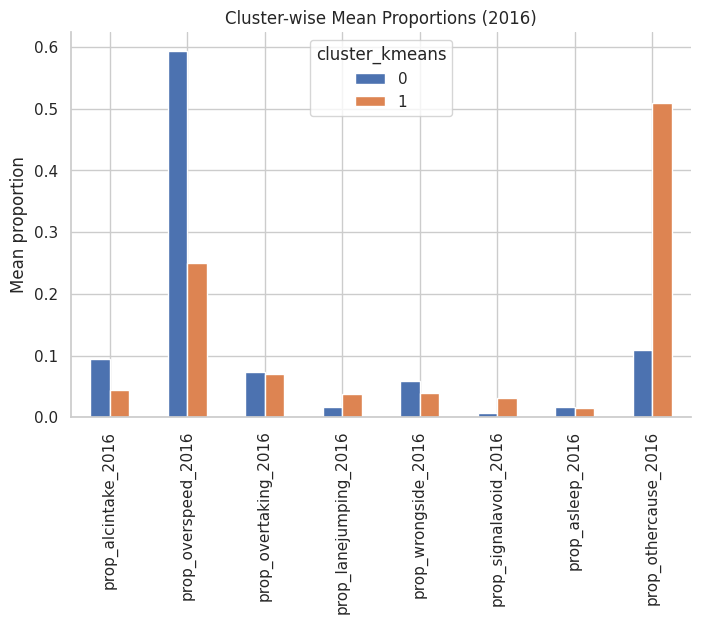

,stateut,cluster_kmeans
0,Andhra Pradesh,0
1,Arunachal Pradesh,0
2,Assam,0
3,Bihar,0
4,Chhattisgarh,0
5,Goa,0
6,Gujarat,0
9,Jammu & Kashmir,0
14,Maharashtra,0
10,Jharkhand,0


In [ ]:
# Use 2016 proportions to compare patterns irrespective of total size
prop_2016_cols = [c for c in df.columns if c.startswith("prop_") and c.endswith("_2016")]

X_clu = df[prop_2016_cols].fillna(0).copy()

# Standardize
scaler = StandardScaler()
Xz = scaler.fit_transform(X_clu)

# Choose k by silhouette (try 2..6)
sil_scores = {}
for k in range(2, 7):
    km = KMeans(n_clusters=k, random_state=42, n_init="auto")
    labels = km.fit_predict(Xz)
    sil = silhouette_score(Xz, labels)
    sil_scores[k] = sil

print("Silhouette by k:", sil_scores)
best_k = max(sil_scores, key=sil_scores.get)
print("Best k =", best_k)

kmeans = KMeans(n_clusters=best_k, random_state=42, n_init="auto")
df["cluster_kmeans"] = kmeans.fit_predict(Xz)

# Show cluster sizes
print(df["cluster_kmeans"].value_counts().sort_index())

# Plot cluster means
cluster_means = df.groupby("cluster_kmeans")[prop_2016_cols].mean()
cluster_means.T.plot(kind="bar")
plt.title("Cluster-wise Mean Proportions (2016)")
plt.ylabel("Mean proportion")
plt.show()

# List states per cluster
if "stateut" in df.columns:
    display(df[["stateut","cluster_kmeans"]].sort_values("cluster_kmeans"))


# **Explainability: Feature Importance + SHAP**

In [ ]:
# Feature importances from RandomForest (classification)
if isinstance(best_cls.named_steps["model"], RandomForestClassifier):
    rf = best_cls.named_steps["model"]
    # Get feature names after preprocessing
    ohe = best_cls.named_steps["prep"].named_transformers_["cat"].named_steps["onehot"]
    cat_names = ohe.get_feature_names_out(cat_feats) if len(cat_feats) else []
    feature_names = list(num_feats) + list(cat_names)
    importances = rf.feature_importances_
    imp_df = pd.DataFrame({"feature": feature_names, "importance": importances}).sort_values("importance", ascending=False)
    print("Top classifier features:")
    display(imp_df.head(15))

# SHAP for regression (on a small background set to avoid compute issues)
try:
    # Build a preprocessed matrix to feed shap for the regressor
    prep = best_reg.named_steps["prep"]
    model_reg = best_reg.named_steps["model"]
    X_reg_pp = prep.transform(X_reg)

    explainer = shap.Explainer(model_reg, X_reg_pp)
    shap_values = explainer(X_reg_pp)

    shap.plots.beeswarm(shap_values, show=True, max_display=15)
    plt.title("SHAP Beeswarm (Regressor)")
    plt.show()
except Exception as e:
    print("SHAP explanation skipped due to:", e)


Top classifier features:


,feature,importance
10,prop_overspeed_2014,0.103371
8,total2014,0.094194
1,overspeed2014,0.085570
13,prop_wrongside_2014,0.076997
0,alcintake2014,0.073998
9,prop_alcintake_2014,0.072527
11,prop_overtaking_2014,0.069796
18,region_east,0.062743
12,prop_lanejumping_2014,0.054198
14,prop_signalavoid_2014,0.049836


SHAP explanation skipped due to: Additivity check failed in TreeExplainer! Please ensure the data matrix you passed to the explainer is the same shape that the model was trained on. If your data shape is correct then please report this on GitHub. This check failed because for one of the samples the sum of the SHAP values was 38056.960197, while the model output was 38057.817500. If this difference is acceptable you can set check_additivity=False to disable this check.


# **Inference Helpers (Predict on New Data)**

In [ ]:
# Example: Predict dominant cause (2016-like) from 2014 features of a new state profile
example = X_cls.iloc[[0]].copy()  # clone first row as a template
pred_cause = best_cls.predict(example)[0]
print("Predicted dominant cause:", pred_cause)

# Example: Predict total2016 from 2014 features
example_reg = X_reg.iloc[[0]].copy()
pred_total = best_reg.predict(example_reg)[0]
print("Predicted total2016:", int(round(pred_total)))


Predicted dominant cause: overspeed
Predicted total2016: 22661


# **Save Artifacts (for Reproducibility)**

In [ ]:
import joblib

joblib.dump(best_cls, "best_classifier.pkl")
joblib.dump(best_reg, "best_regressor.pkl")
df.to_csv("dataset_enriched.csv", index=False)

print("Saved: best_classifier.pkl, best_regressor.pkl, dataset_enriched.csv")


Saved: best_classifier.pkl, best_regressor.pkl, dataset_enriched.csv


# **Conclusion**



This study analyzed driver-related accident causes across Indian states and regions for the years 2014 and 2016, with a focus on overspeeding, alcohol intake, and signal avoidance. Using machine learning algorithms such as Logistic Regression, Support Vector Machine, Random Forest, and XGBoost for classification and regression tasks, along with K-Means and Hierarchical clustering for unsupervised analysis, we derived meaningful insights into accident patterns.

The results indicate that overspeeding remains the dominant cause of road accidents across most states, while alcohol-related accidents show regional variation. Machine learning models, particularly Random Forest and XGBoost, demonstrated strong predictive capability, while clustering analysis successfully grouped states with similar accident profiles, thereby enabling comparative policy evaluation.

Overall, the proposed approach highlights the potential of data-driven methods in understanding and addressing road safety challenges. By identifying high-risk states and key contributing factors, this work provides actionable insights for policymakers and enforcement agencies to design targeted interventions. Future work can extend this study by incorporating additional years of data, socio-economic indicators, and real-time accident reporting systems to enhance predictive accuracy and practical applicability.